In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
import seaborn as sns

In [38]:
df = pd.read_csv('energy_efficiency_data.csv')
df.head(5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Описание набора данных
**Предметная область:** Строительная физика, архитектура и энергоэффективность зданий.

**Источник данных:** https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set/data

**Характер данных:** Набор данных представляет собой результаты моделирования энергетических характеристик зданий. Значения имитационные, получены с помощью физического моделирования. Данные являются синтетическими, но отражают реальные инженерные зависимости. Все признаки числовые.

**Описание атрибутов:**

**Признаки**
| Атрибут | Тип | Описание |
|--------|------|----------|
| Relative Compactness | числовой | Компактность здания |
| Surface Area | числовой | Площадь внешних поверхностей |
| Wall Area | числовой | Площадь стен |
| Roof Area | числовой | Площадь крыши |
| Overall Height | числовой | Высота здания |
| Orientation | числовой | Ориентация фасада (кодовое число 2–5) |
| Glazing Area | числовой | Доля остекления |
| Glazing Area Distribution | числовой | Распределение остекления (север/восток/юг/запад) |

**Целевые переменные**
| Атрибут | Тип | Описание |
|---------|------|----------|
| Heating Load | числовой | Потребность в отоплении |
| Cooling Load | числовой | Потребность в охлаждении |

**Описание задачи анализа:** Датасет предназначен для решения задач регрессии - прогнозирования потребности здания в отоплении (Heating Load) и охлаждении (Cooling Load).



In [14]:
df.describe().loc[['mean', 'std']]

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306



Анализ атрибута: Relative_Compactness
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 0.76
Стандартное отклонение: 0.11
Выбросы (IQR метод): 0 значений


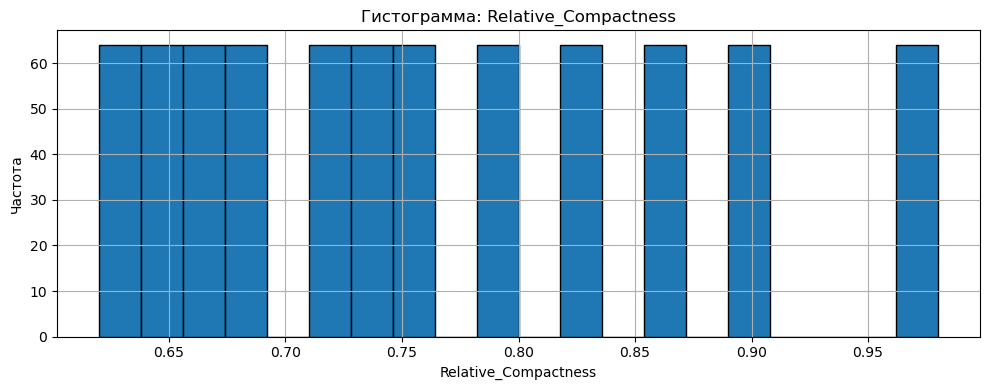


Анализ атрибута: Surface_Area
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 671.71
Стандартное отклонение: 88.09
Выбросы (IQR метод): 0 значений


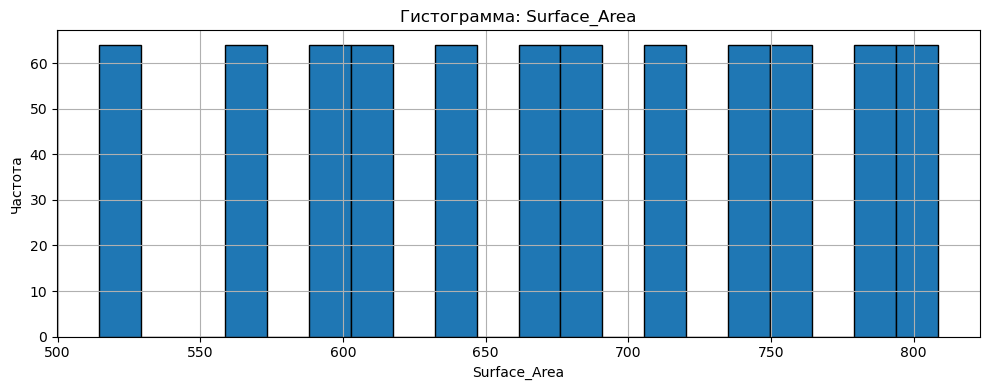


Анализ атрибута: Wall_Area
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 318.5
Стандартное отклонение: 43.63
Выбросы (IQR метод): 0 значений


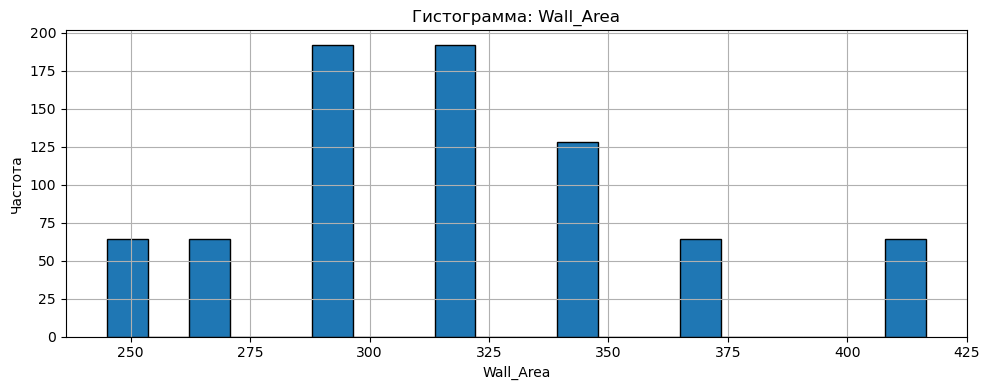


Анализ атрибута: Roof_Area
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 176.6
Стандартное отклонение: 45.17
Выбросы (IQR метод): 0 значений


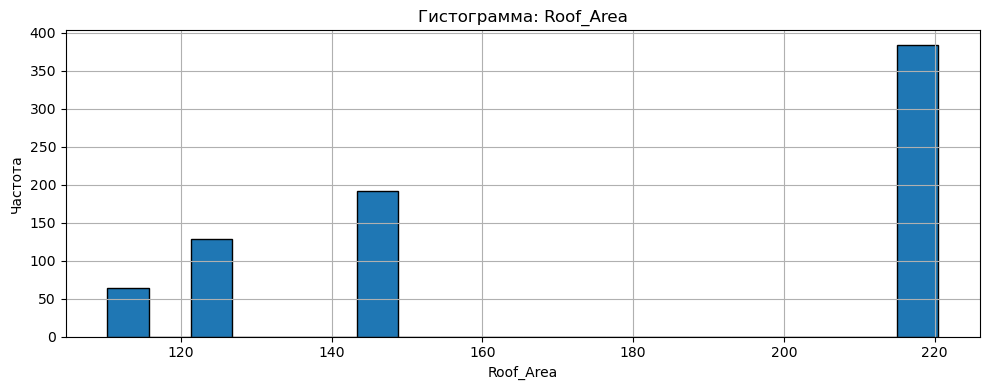


Анализ атрибута: Overall_Height
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 5.25
Стандартное отклонение: 1.75
Выбросы (IQR метод): 0 значений


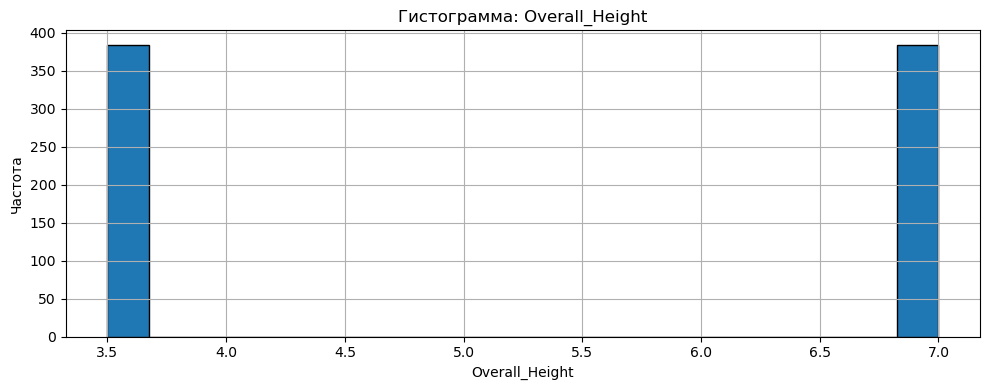


Анализ атрибута: Orientation
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 3.5
Стандартное отклонение: 1.12
Выбросы (IQR метод): 0 значений


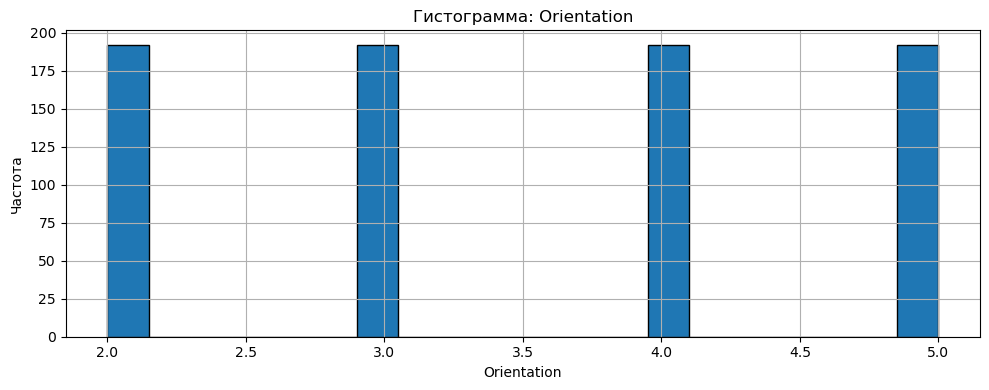


Анализ атрибута: Glazing_Area
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 0.23
Стандартное отклонение: 0.13
Выбросы (IQR метод): 0 значений


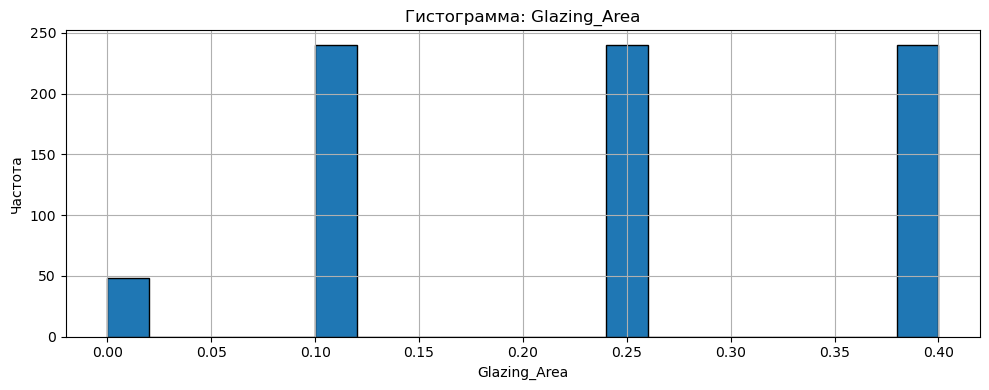


Анализ атрибута: Glazing_Area_Distribution
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 2.81
Стандартное отклонение: 1.55
Выбросы (IQR метод): 0 значений


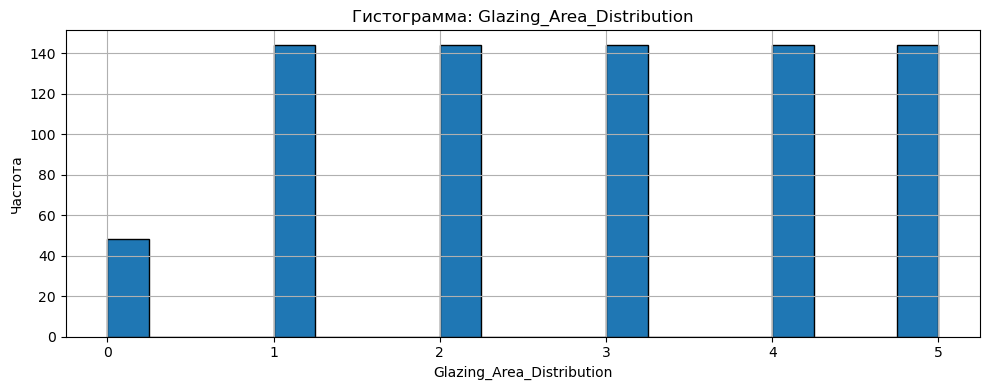


Анализ атрибута: Heating_Load
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 22.31
Стандартное отклонение: 10.09
Выбросы (IQR метод): 0 значений


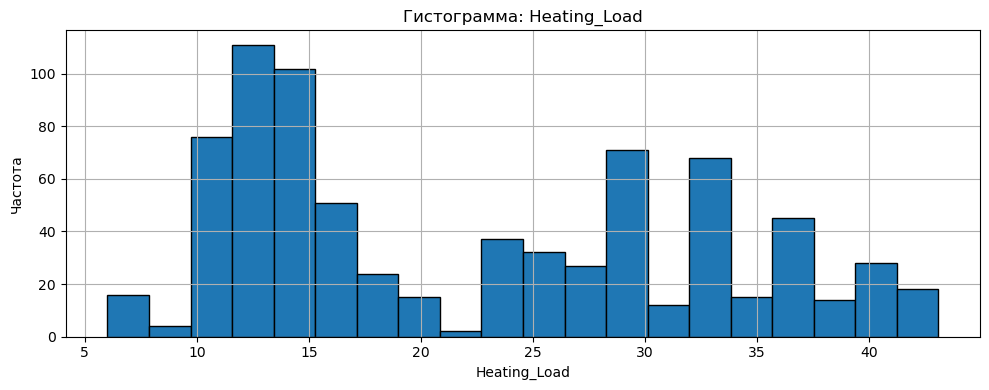


Анализ атрибута: Cooling_Load
Пропущенные значения: 0
Предложение: обработка пропусков не требуется
Среднее значение: 24.59
Стандартное отклонение: 9.51
Выбросы (IQR метод): 0 значений


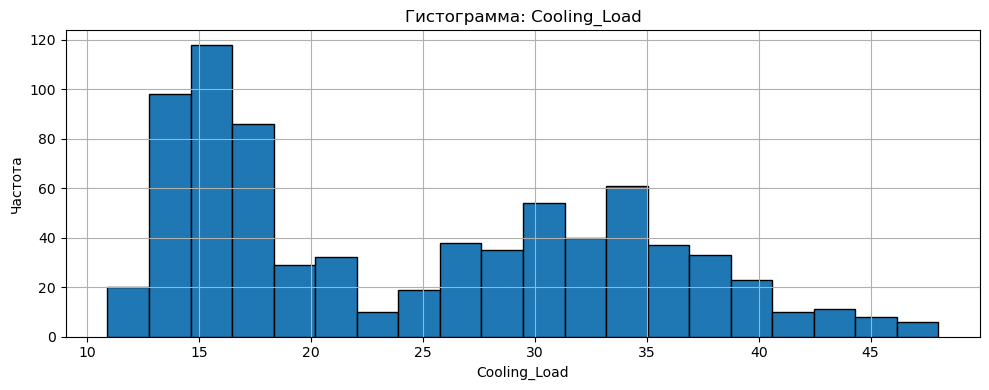

In [54]:
for column in df.columns:
    print('\nАнализ атрибута:', column)
    missing_count = df[column].isnull().sum()
    print('Пропущенные значения:', missing_count)
    if missing_count > 0:
        print('Предложение: заполнить средним или медианой')
    else:
        print('Предложение: обработка пропусков не требуется')
    print('Среднее значение:', round(df[column].mean(), 2))
    print('Стандартное отклонение:', round(df[column].std(), 2))

    # Анализ выбросов по IQR методу 
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[column] < (q1 - 1.5 * iqr)) | (df[column] > (q3 + 1.5 * iqr))]
    print('Выбросы (IQR метод):', len(outliers), 'значений')
    
    # Гистограмма
    plt.figure(figsize=(10, 4))
    df[column].hist(bins=20, edgecolor='black')
    plt.title('Гистограмма: ' + column)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

In [28]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='vlag').format(precision=2).set_caption("Матрица корреляции признаков")

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
Surface_Area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
Wall_Area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
Roof_Area,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
Overall_Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
Orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
Glazing_Area,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
Glazing_Area_Distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Heating_Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling_Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


In [56]:
print("\nВысококоррелированные атрибуты (≥ 0.70)")
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        r = corr_matrix.iloc[i, j]
        if abs(r) >= 0.70:
            corr_type = "положительная" if r > 0 else "отрицательная"
            print(f"{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}  r = {r:.3f}  {corr_type}, высокая корреляция")

print("\nАтрибуты, не имеющие корреляцию (< 0.10)")
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        r = corr_matrix.iloc[i, j]
        if abs(r) < 0.10:
            print(f"{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}  r = {r:.3f}")



Высококоррелированные атрибуты (≥ 0.70)
Relative_Compactness <-> Surface_Area  r = -0.992  отрицательная, высокая корреляция
Relative_Compactness <-> Roof_Area  r = -0.869  отрицательная, высокая корреляция
Relative_Compactness <-> Overall_Height  r = 0.828  положительная, высокая корреляция
Surface_Area <-> Roof_Area  r = 0.881  положительная, высокая корреляция
Surface_Area <-> Overall_Height  r = -0.858  отрицательная, высокая корреляция
Roof_Area <-> Overall_Height  r = -0.973  отрицательная, высокая корреляция
Roof_Area <-> Heating_Load  r = -0.862  отрицательная, высокая корреляция
Roof_Area <-> Cooling_Load  r = -0.863  отрицательная, высокая корреляция
Overall_Height <-> Heating_Load  r = 0.889  положительная, высокая корреляция
Overall_Height <-> Cooling_Load  r = 0.896  положительная, высокая корреляция
Heating_Load <-> Cooling_Load  r = 0.976  положительная, высокая корреляция

Атрибуты, не имеющие корреляцию (< 0.10)
Relative_Compactness <-> Orientation  r = 0.000
Relative

# Mатрица графиков рассеивания

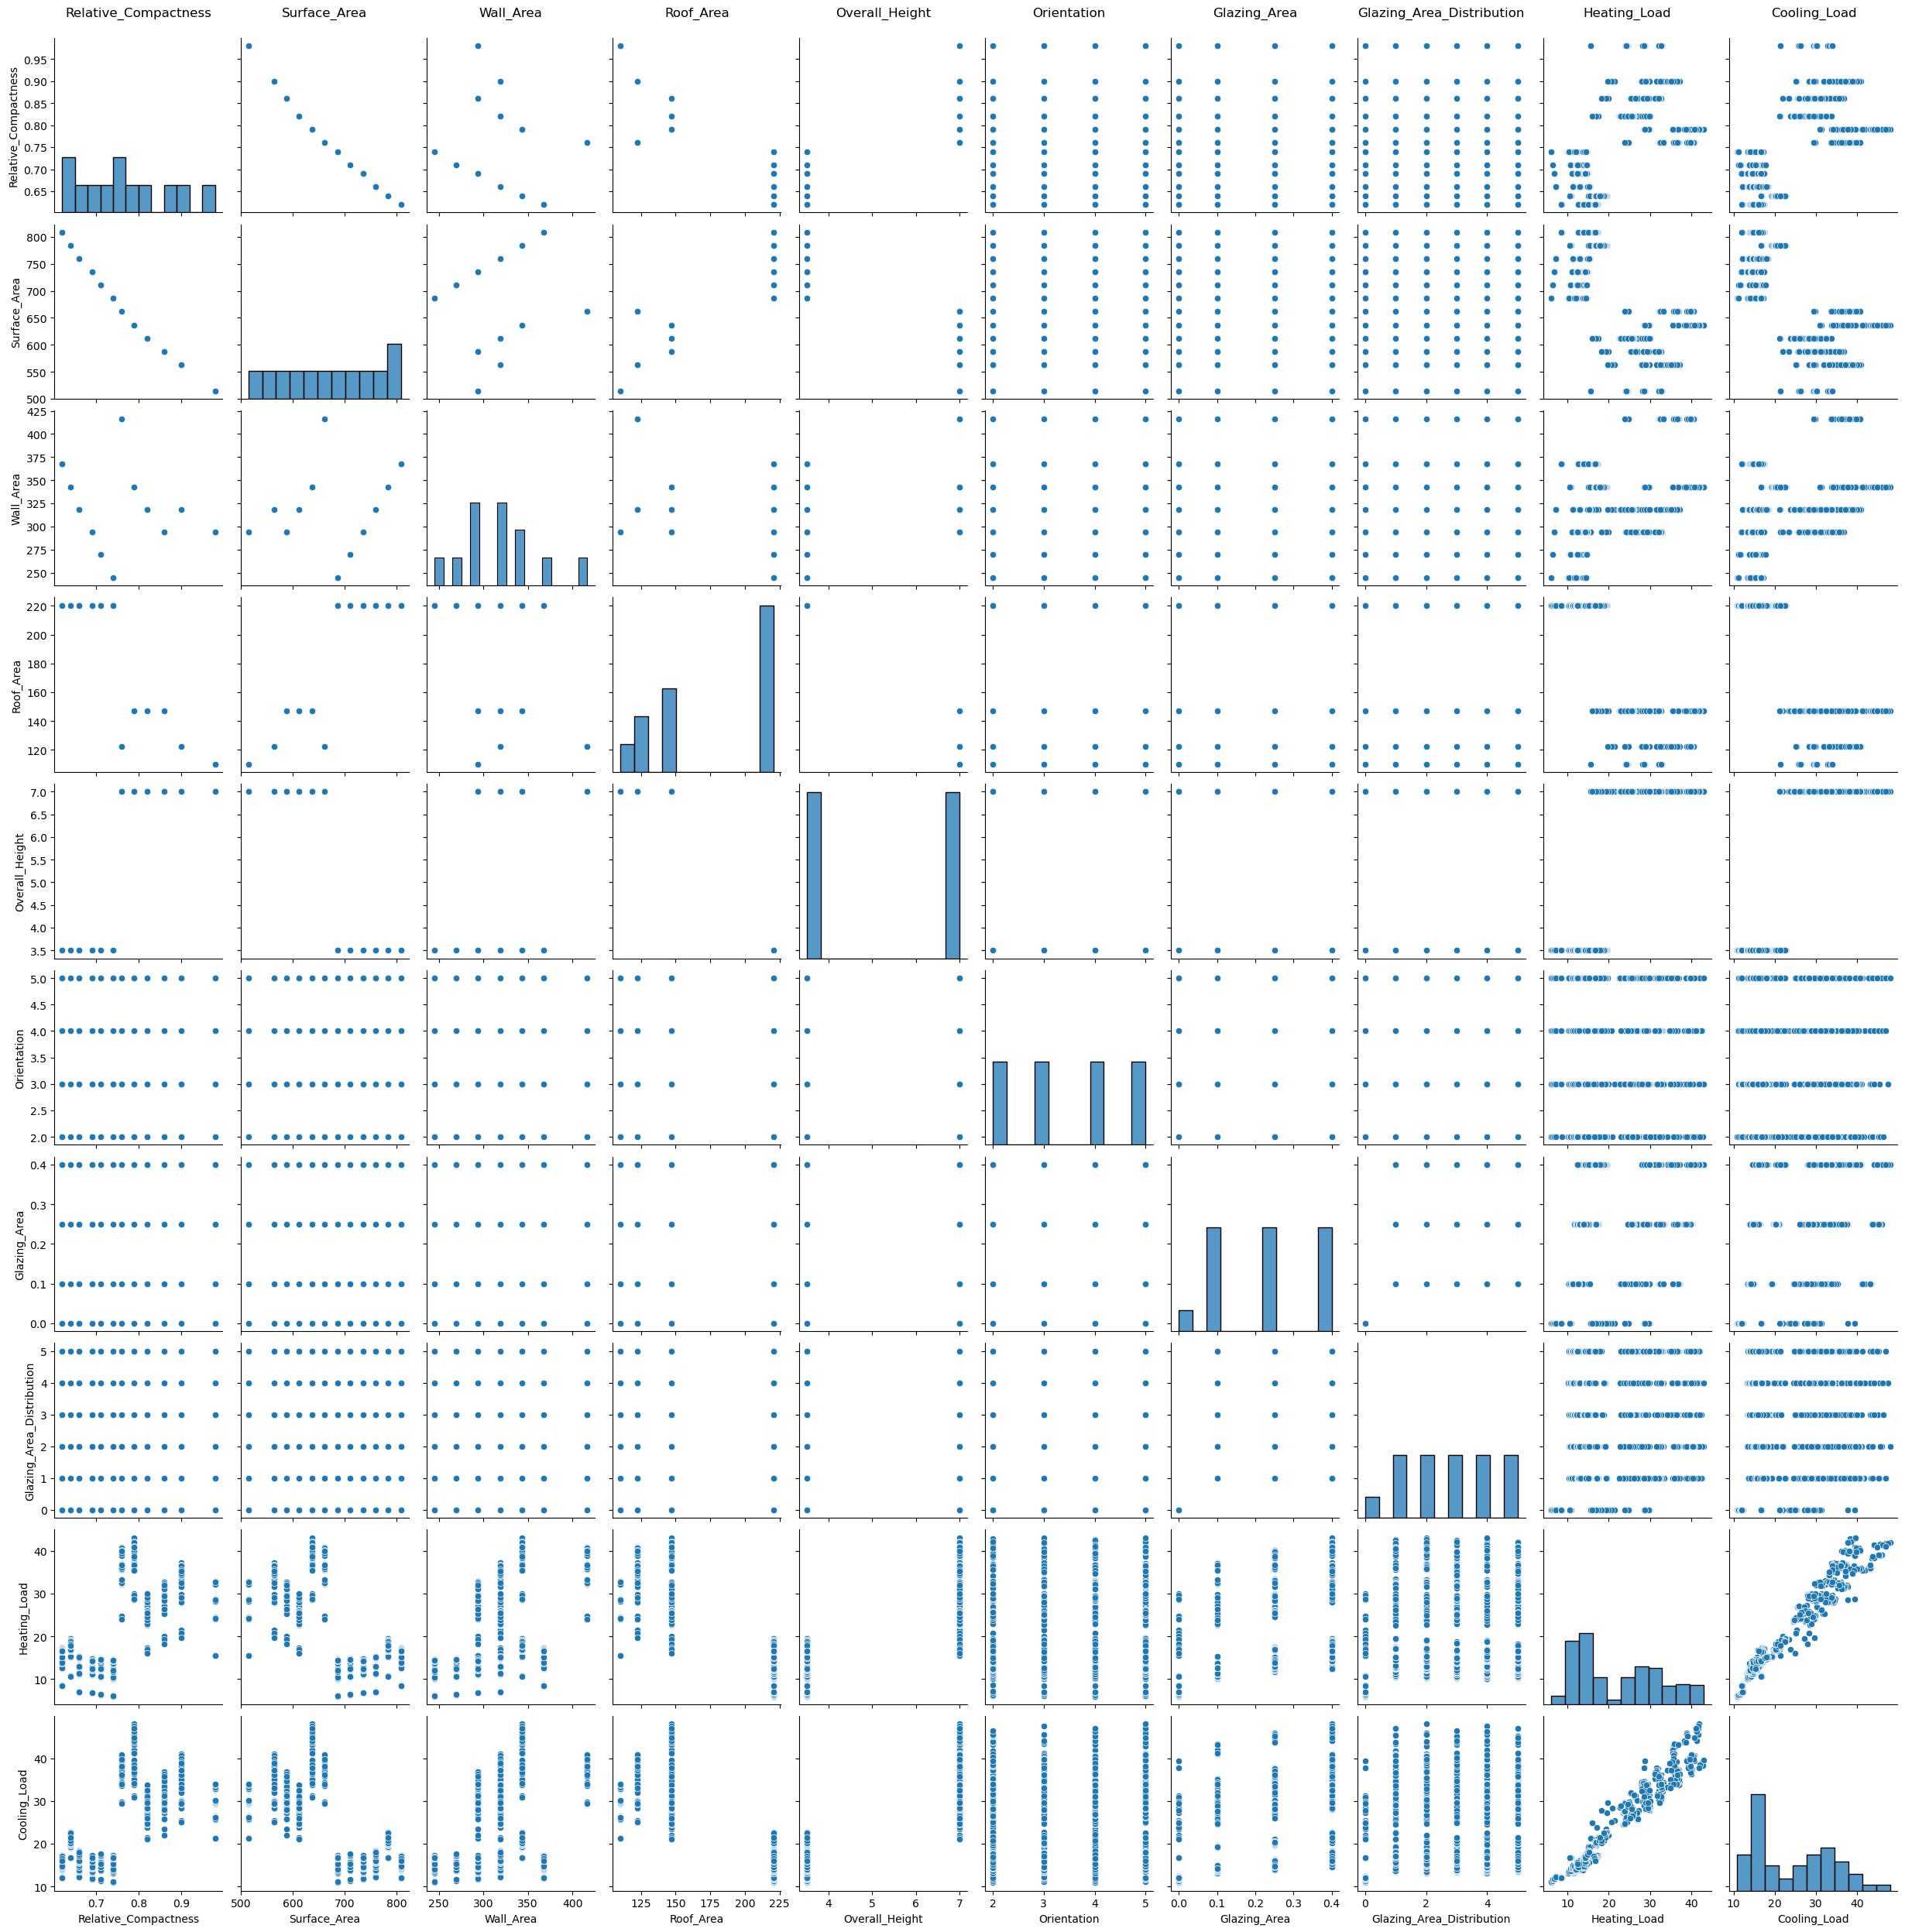

In [52]:
matrix = sns.pairplot(df.select_dtypes(include='number'))
for i, col in enumerate(df.select_dtypes(include='number').columns):
    matrix.axes[0, i].set_title(col, pad=20)
plt.show()

# Анализ результатов корреляции
**Высококоррелированные атрибуты (≥ 0.7):**

Relative_Compactness <-> Surface_Area (r = -0.992) - чем выше компактность здания, тем меньше площадь его внешней поверхности.

Relative_Compactness <-> Roof_Area (r = -0.869) - более компактные здания имеют меньшую площадь крыши.

Relative_Compactness <-> Overall_Height (r = 0.828) - чем выше здание, тем более компактную форму оно имеет.

Surface_Area <-> Roof_Area (r = 0.881 ) - здания с большой поверхностью имеют большую площадь крыши.

Roof_Area <-> Heating_Load (r = -0.862) - здания с меньшей площадью крыши требуют большего отопления.

Roof_Area <-> Cooling_Load (r = -0.863) - меньшая площадь крыши связана с повышенным расходом энергии на охлаждение.

Overall_Height <-> Heating_Load (r = 0.889) - чем выше здание, тем выше тепловая нагрузка, оно требует больше энергии на отопление.

Overall_Height <-> Cooling_Load (r = 0.896) - высокие здания требуют большего охлаждения из-за увеличенной площади теплопередачи.

Heating_Load <-> Cooling_Load (r = 0.976) - здания, которые требуют много отопления, обычно требуют и много охлаждения.

**Атрибуты, не имеющие корреляцию (< 0.10):**

Orientation ↔ другие параметры (r от -0.02 до 0.05) - ориентация фасада почти не влияет на энергоэффективность в моделируемых условиях.

Glazing Area Distribution ↔ другие параметры (r от -0.04 до 0.08) - распределение остекления по сторонам света влияет очень слабо.

Ориентация и вариант распределения окон дают минимальный вклад по сравнению с более значимыми параметрами - высотой и площадью.

**Вывод:**
Наиболее значимые факторы энергоэффективности - площадь крыши и высота здания; Heating Load и Cooling Load сильно связаны между собой, что отражает единые теплотехнические свойства здания.